In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000708781"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000708781
SIC,7389
Description,"SERVICES-BUSINESS SERVICES, NEC"
Name,CASS INFORMATION SYSTEMS INC
Ticker,CASS


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
net income,52.0,5.559865e+06,1.095278e+06,3535000.0,4746750.0,5729000.0,6089750.0,8163000.0
provision for loan losses,35.0,1.400000e+05,4.315754e+05,-1000000.0,0.0,0.0,275000.0,1150000.0
total revenue,52.0,2.776592e+07,5.037265e+06,19957000.0,22762250.0,28269500.0,30640000.0,38370000.0


# Plots

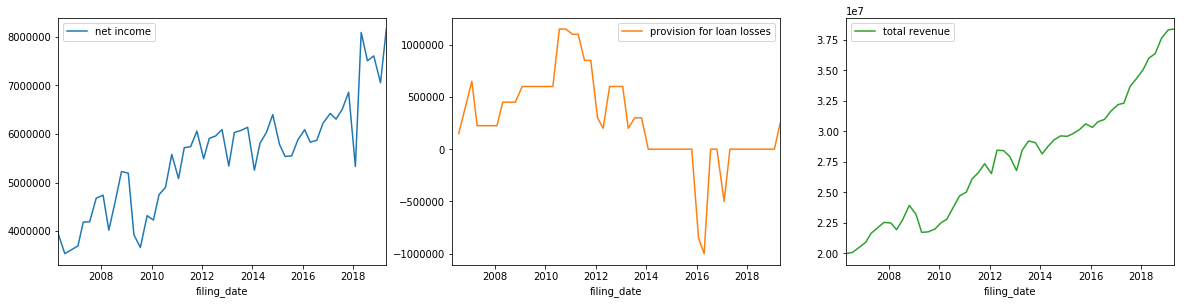

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                              
0000708781 book value per share                              None    empty   
           interest income                                   None    empty   
           net income                                      2006Q3  missing   
           net interest income                               None    empty   
           provision for loan losses                       2006Q1  missing   
           provision for loan losses                       2006Q3  missing   
           provision for loan losses  2007Q2 to 2007Q3: 2 periods  missing   
           provision for loan losses  2008Q2 to 2008Q3: 2 periods  missing   
           provision for loan losses  2009Q1 to 2010Q1: 5 periods  missing   
           provision for loan losses                       2010Q3  missing   
           provision for loan losses                       2011Q1  missing   
           provision for loan losses                       2011Q3  missing   
           provision for loan losses  2012Q3 to 2012Q4: 2 periods  missing   
           provision for loan losses                       2013Q3  missing   
           provision for loan losses                       2014Q1  missing   
           total revenue                                   2006Q3  missing   

                                                 message  
cik        item                                           
0000708781 book value per share       No values for item  
           interest income            No values for item  
           net income                     Missing period  
           net interest income        No values for item  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue                  Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()